In [1]:
import numpy as np
from numpy import genfromtxt
import csv
import os

import pysindy as ps

import deepSI
from deepSI import System_data

import matplotlib.pyplot as plt

c:\Users\20173928\Miniconda3\envs\sindy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_PATH = r"C:\Users\20173928\OneDrive - TU Eindhoven\Documents\Master\thesis\code\data\\"

WIENER = "WienerHammerBenchmark"
SILVER = "SNLS80mV"
# change data set
DATA = SILVER
CSV = ".csv"

PATH = os.path.join(DATA_PATH, DATA+CSV)

# load data
data = genfromtxt(PATH, delimiter=",")

In [3]:
# drop nan's may need to be adjusted between data sets
mask = ~np.isnan(data)
data = data[mask[:,0],:]
data = data[:,:-1]

In [4]:
import deepSI
from deepSI import System_data
# system_data = System_data(u=ulist,y=ylist)
system_data = System_data(u=data[:,0],y=data[:,1])
train, test = system_data[:80000], system_data[80000:]

In [5]:
fit_sys_ss_enc = deepSI.fit_systems.SS_encoder(nx=2, na=50, nb=50) #state dimention = 6, past outputs = 3, past inputs = 3.
train_enc, val_enc = train.train_test_split(split_fraction=0.2)

#Start fitting
fit_sys_ss_enc.fit(train_sys_data=train_enc, val_sys_data=val_enc, \
                   epochs=20, batch_size=1024, loss_kwargs={'nf':80}) #nf is T in paper

Initilizing the model and optimizer
Size of the training array =  126.7 MB
N_training_samples = 63871, batch_size = 1024, N_batch_updates_per_epoch = 62
Initial Validation sim-NRMS= 1.067658126488387


  5%|▌         | 1/20 [00:17<05:34, 17.59s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.5498772070212289
Epoch    1, sqrt loss  0.8164, Val sim-NRMS 0.5499, Time Loss: 77.6%, data: 0.4%, val: 22.1%,  3.5 batches/sec


 10%|█         | 2/20 [00:35<05:18, 17.71s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.25778008229720206
Epoch    2, sqrt loss  0.5028, Val sim-NRMS 0.2578, Time Loss: 76.4%, data: 0.4%, val: 23.2%,  3.5 batches/sec


 15%|█▌        | 3/20 [00:51<04:52, 17.21s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.15809334655219534
Epoch    3, sqrt loss  0.2448, Val sim-NRMS 0.1581, Time Loss: 75.9%, data: 0.3%, val: 23.8%,  3.6 batches/sec


 20%|██        | 4/20 [01:10<04:41, 17.61s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.1458689274637992
Epoch    4, sqrt loss  0.1867, Val sim-NRMS 0.1459, Time Loss: 75.7%, data: 0.3%, val: 24.0%,  3.5 batches/sec


 25%|██▌       | 5/20 [01:26<04:17, 17.17s/it]

Epoch    5, sqrt loss  0.1663, Val sim-NRMS 0.1522, Time Loss: 75.8%, data: 0.3%, val: 23.9%,  3.6 batches/sec


 30%|███       | 6/20 [01:43<03:57, 16.94s/it]

Epoch    6, sqrt loss  0.1538, Val sim-NRMS 0.1858, Time Loss: 75.5%, data: 0.3%, val: 24.1%,  3.6 batches/sec


 35%|███▌      | 7/20 [02:01<03:45, 17.37s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.10666346865787961
Epoch    7, sqrt loss  0.1492, Val sim-NRMS 0.1067, Time Loss: 74.8%, data: 0.3%, val: 24.9%,  3.6 batches/sec


 40%|████      | 8/20 [02:20<03:34, 17.87s/it]

Epoch    8, sqrt loss  0.1512, Val sim-NRMS 0.2039, Time Loss: 75.0%, data: 0.3%, val: 24.7%,  3.5 batches/sec


 45%|████▌     | 9/20 [02:36<03:12, 17.50s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.08907993867380115
Epoch    9, sqrt loss  0.1373, Val sim-NRMS 0.08908, Time Loss: 75.2%, data: 0.3%, val: 24.6%,  3.6 batches/sec


 50%|█████     | 10/20 [02:53<02:51, 17.17s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.08456341417434034
Epoch   10, sqrt loss  0.1186, Val sim-NRMS 0.08456, Time Loss: 74.9%, data: 0.2%, val: 24.8%,  3.6 batches/sec


 55%|█████▌    | 11/20 [03:10<02:34, 17.15s/it]

Epoch   11, sqrt loss  0.1314, Val sim-NRMS 0.1224, Time Loss: 75.1%, data: 0.2%, val: 24.7%,  3.6 batches/sec


 60%|██████    | 12/20 [03:26<02:14, 16.78s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07465091076405883
Epoch   12, sqrt loss  0.1011, Val sim-NRMS 0.07465, Time Loss: 75.2%, data: 0.2%, val: 24.6%,  3.6 batches/sec


 65%|██████▌   | 13/20 [03:43<01:58, 16.89s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06497845643200008
Epoch   13, sqrt loss  0.1108, Val sim-NRMS 0.06498, Time Loss: 75.3%, data: 0.2%, val: 24.5%,  3.6 batches/sec


 70%|███████   | 14/20 [04:16<02:09, 21.58s/it]

Epoch   14, sqrt loss  0.1523, Val sim-NRMS 0.07637, Time Loss: 76.5%, data: 0.2%, val: 23.3%,  3.4 batches/sec


 75%|███████▌  | 15/20 [04:35<01:45, 21.08s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06013137575632655
Epoch   15, sqrt loss 0.08768, Val sim-NRMS 0.06013, Time Loss: 76.2%, data: 0.2%, val: 23.5%,  3.4 batches/sec


 80%|████████  | 16/20 [04:56<01:23, 20.85s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.055100158769373075
Epoch   16, sqrt loss 0.09128, Val sim-NRMS 0.0551, Time Loss: 76.1%, data: 0.2%, val: 23.6%,  3.3 batches/sec


 85%|████████▌ | 17/20 [05:16<01:01, 20.61s/it]

Epoch   17, sqrt loss  0.1176, Val sim-NRMS 0.07636, Time Loss: 76.2%, data: 0.3%, val: 23.6%,  3.3 batches/sec


 90%|█████████ | 18/20 [05:32<00:38, 19.28s/it]

Epoch   18, sqrt loss 0.08554, Val sim-NRMS 0.05517, Time Loss: 76.2%, data: 0.2%, val: 23.6%,  3.4 batches/sec


 95%|█████████▌| 19/20 [05:49<00:18, 18.64s/it]

Epoch   19, sqrt loss  0.1027, Val sim-NRMS 0.2306, Time Loss: 76.2%, data: 0.2%, val: 23.6%,  3.4 batches/sec


100%|██████████| 20/20 [06:06<00:00, 18.30s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.042518017699131
Epoch   20, sqrt loss 0.09655, Val sim-NRMS 0.04252, Time Loss: 76.0%, data: 0.2%, val: 23.7%,  3.4 batches/sec


Loaded model with best known validation sim-NRMS of 0.04252 which happened on epoch 20 (epoch_id=20.00)


In [6]:
print(fit_sys_ss_enc.fn) #state network x_t+1 = f([x,u])
print(fit_sys_ss_enc.hn) #output network y_t = h(x_t)
print(fit_sys_ss_enc.encoder) #encoder network x_t = psi([upast, ypast])

simple_res_net(
  (net_lin): Linear(in_features=3, out_features=2, bias=True)
  (net_non_lin): feed_forward_nn(
    (net): Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=2, bias=True)
    )
  )
)
simple_res_net(
  (net_lin): Linear(in_features=2, out_features=1, bias=True)
  (net_non_lin): feed_forward_nn(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
simple_res_net(
  (net_lin): Linear(in_features=100, out_features=2, bias=True)
  (net_non_lin): feed_forward_nn(
    (net): Sequential(
      (0): Linear(in_features=100, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=6

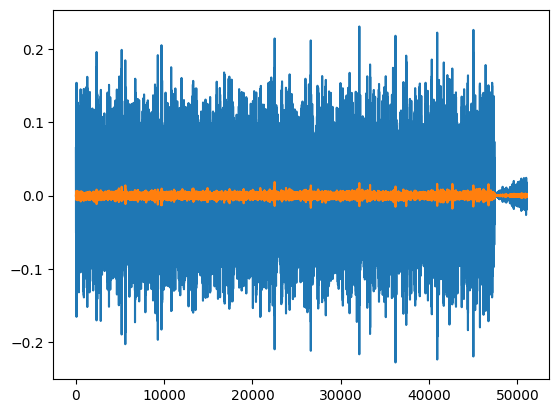

NRMS simulation SS encoder 4.31%


In [7]:
test_sim_enc = fit_sys_ss_enc.apply_experiment(test)

plt.plot(test.y)
plt.plot(test.y - test_sim_enc.y)
plt.show()
print(f'NRMS simulation SS encoder {test_sim_enc.NRMS(test):.2%}')

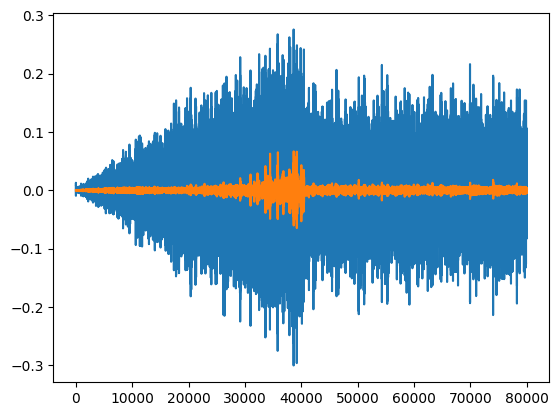

NRMS simulation SS encoder 6.75%


In [9]:
train_sim_enc = fit_sys_ss_enc.apply_experiment(train)

plt.plot(train.y)
plt.plot(train.y - train_sim_enc.y)
plt.show()
print(f'NRMS simulation SS encoder {train_sim_enc.NRMS(train):.2%}')